In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, peak_widths

pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/SantiagoJulioD/LabAv2/refs/heads/main/La2O3junio3.csv',names=['2Theta','I'])
bg = pd.read_csv('https://raw.githubusercontent.com/SantiagoJulioD/LabAv2/refs/heads/main/background.csv',names=['2Theta','I'])
db = pd.read_csv('https://raw.githubusercontent.com/SantiagoJulioD/LabAv2/refs/heads/main/AMS_La2O3.csv')
theo = pd.read_csv('https://raw.githubusercontent.com/SantiagoJulioD/LabAv2/refs/heads/main/4102405.csv')

In [3]:
func = lambda x,a,b,c: a*np.exp(-b*x)+c

pars,_ = curve_fit(func,bg['2Theta'],bg['I'])

noise = lambda x: func(x,*pars)

bg_fit = pd.DataFrame()
bg_fit['2Theta'] = raw_data['2Theta']
bg_fit['I'] = noise(bg_fit['2Theta'])


c:\Users\santi\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


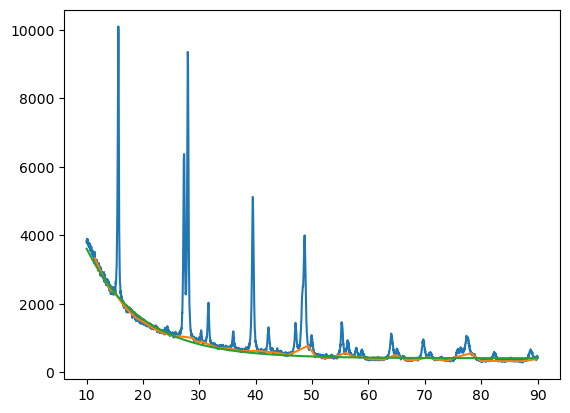

In [4]:
plt.plot(raw_data['2Theta'],raw_data['I'])
plt.plot(bg['2Theta'],bg['I'])
plt.plot(bg_fit['2Theta'],bg_fit['I'])

In [5]:
filtered_data = pd.DataFrame()
filtered_data['2Theta'] = raw_data['2Theta']
filtered_data['I'] = raw_data['I']-bg_fit['I']
filtered_data['I'] = filtered_data['I']/np.max(filtered_data['I'])

In [6]:
db['Norm_Intensity'] = db['INTENSITY']/np.max(db['INTENSITY'])
db

,2-THETA,INTENSITY,D-SPACING,H,K,L,Multiplicity,Norm_Intensity
0,14.47,6.09,6.1200,0,0,1,2,0.105748
1,26.18,17.96,3.4035,1,0,0,6,0.311860
2,29.18,15.34,3.0600,0,0,2,2,0.266366
3,30.04,57.59,2.9745,0,1,1,6,1.000000
4,30.04,42.41,2.9745,1,0,1,6,0.736413
5,39.61,9.30,2.2755,0,1,2,6,0.161486
6,39.61,9.30,2.2755,1,0,2,6,0.161486
7,46.20,16.18,1.9650,1,1,0,3,0.280952
8,52.28,7.75,1.7498,0,1,3,6,0.134572
9,52.28,10.03,1.7498,1,0,3,6,0.174162


In [18]:
peak_ind = find_peaks(filtered_data['I'].values,height=0.25)
peaks = filtered_data.iloc[peak_ind[0]]
peaks['h'] = [1,0,1,1,1]
peaks['k'] = [0,0,0,0,1]
peaks['l'] = [0,2,1,2,0]

peaks

,2Theta,I,h,k,l
214,15.643191,0.935514,1,0,0
658,27.302882,0.642625,0,0,2
683,27.959396,1.000000,1,0,1
1122,39.487784,0.539844,1,0,2
1472,48.678982,0.417952,1,1,0


In [13]:
filtered_data

,2Theta,I
0,10.023430,0.025019
1,10.049691,0.020838
2,10.075951,0.035468
3,10.102212,0.029269
4,10.128473,0.022595
...,...,...
3041,89.881808,0.001034
3042,89.908069,0.004348
3043,89.934330,0.008489
3044,89.960590,0.001627


[(-0.05, 1.2)]

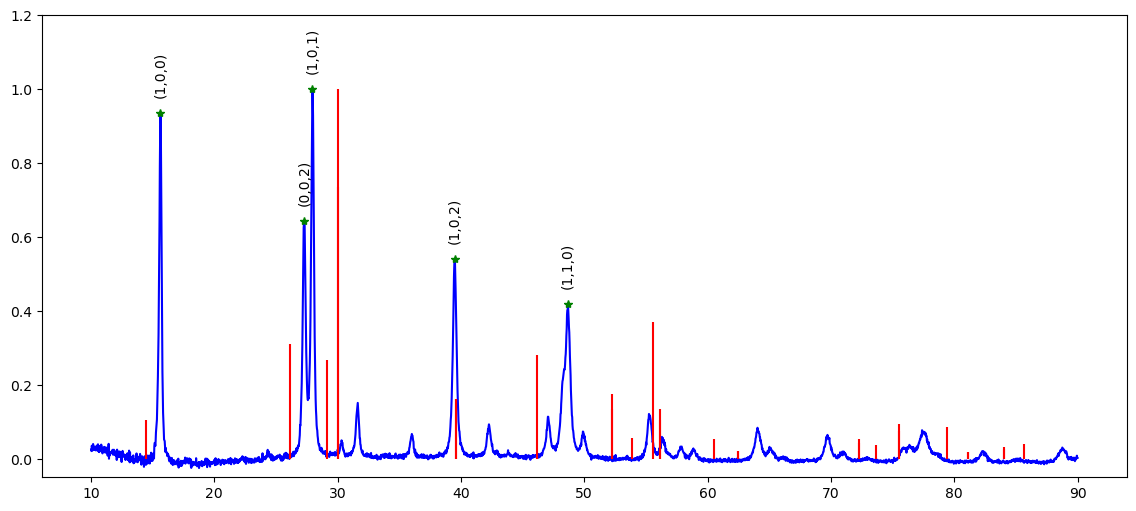

In [35]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(filtered_data['2Theta'],filtered_data['I'],color='b')
for i in range(len(db['2-THETA'].values)):
    ax.vlines(db.iloc[i]['2-THETA'],0,db.iloc[i]['Norm_Intensity'],color='r') 

ax.plot(peaks['2Theta'],peaks['I'],'g*')
for i in range(len(peaks['2Theta'].values)):
    h = peaks['h'].values[i]
    k = peaks['k'].values[i]
    l = peaks['l'].values[i]
    ax.text(peaks['2Theta'].values[i],peaks['I'].values[i]+0.05,s=f'({h},{k},{l})',ha='center',rotation=90)

ax.set(ylim=(-0.05,1.2))


In [ ]:
# Lattice parameters

a = 3.95700
b = 3.95715
c = 6.13800

alpha = 90.
beta = 90.
gamma = 120.

In [125]:
# peak widths 

results_half = peak_widths(raw_data['I'].values, peak_ind[0], rel_height=0.5)

results_half[0]

array([ 8.5114648 ,  9.019025  , 10.07211351, 13.3156128 , 25.5526742 ])

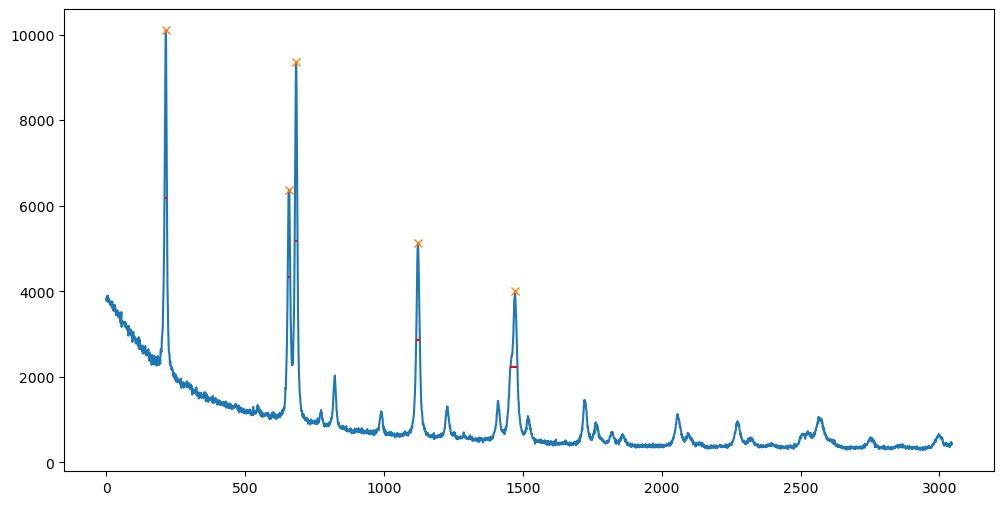

In [131]:
plt.figure(figsize=(12,6))

plt.plot(raw_data['I'].values)

plt.plot(peak_ind[0], raw_data['I'].values[peak_ind[0]], "x")

plt.hlines(*results_half[1:], color="r")

#plt.xlim(0,500)
plt.show()


In [132]:
def ind2angle(index):
    b = filtered_data['2Theta'].values[0]
    m = (filtered_data['2Theta'].values[-1]-filtered_data['2Theta'].values[0])/(len(filtered_data)-1)
    return b+m*index

ind2angle = np.vectorize(ind2angle)

In [133]:
Bs = ind2angle(results_half)
Bs[0] = Bs[3]-Bs[2]

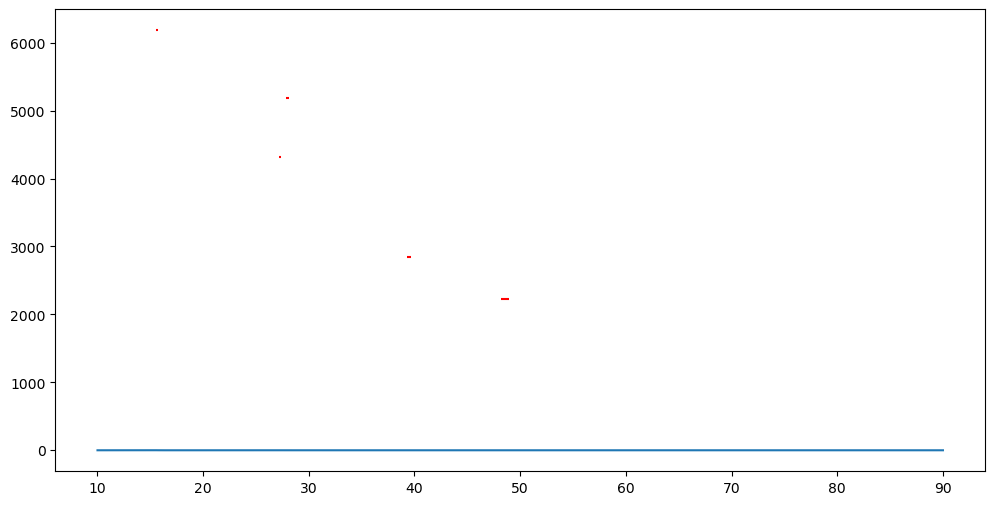

In [134]:
plt.figure(figsize=(12,6))

plt.plot(filtered_data['2Theta'].values,filtered_data['I'].values)

#plt.plot(peak_ind[0], filtered_data['I'].values[peak_ind[0]], "x")

plt.hlines(results_half[1],*Bs[2:], color="r")

#plt.xlim(0,500)
plt.show()


In [135]:
peaks['B'] = Bs[0]

In [136]:
line = lambda x,m,b: m*x+b

xs = 4*np.sin(np.pi/180*peaks['2Theta']/2)
ys = peaks['B']*np.cos(np.pi/180*peaks['2Theta']/2)

pars2,mcov = curve_fit(line,xs,ys)

In [137]:
results_half[0]

array([ 8.5114648 ,  9.019025  , 10.07211351, 13.3156128 , 25.5526742 ])

In [138]:
peaks['B']

214     0.223516
658     0.236845
683     0.264499
1122    0.349676
1472    0.671028
Name: B, dtype: float64

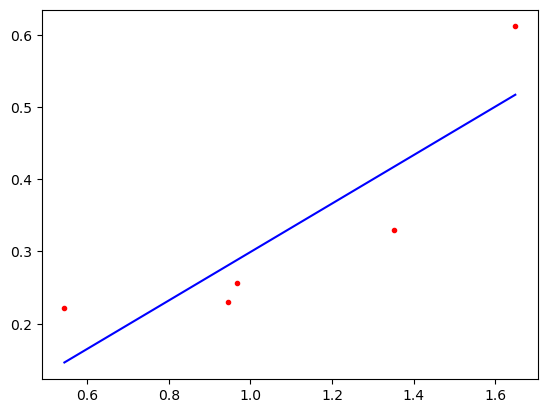

In [139]:
xfit = np.linspace(xs.values[0],xs.values[-1])
yfit = line(xfit,*pars2)

plt.plot(xs,ys,'r.')
plt.plot(xfit,yfit,'b')

In [140]:
lam = 1.540598

strain = pars2[0]
size = 0.94*lam/pars2[1]
strain,size

(0.33561528207848734, -39.81226606484797)